In [1]:
import numpy as np
from source_helper import *
import matplotlib.pyplot as plt
% matplotlib inline
from time import time

In [2]:
N = 20
m = np.zeros((2*N, 2*N))
coords = np.zeros((2*N, 2*N))
dx = 1./N
c = 1
xwd = 0
ywd = 0

t = time()
for cntr in range(10):
    u = float(cntr+1)
    for i in range(2*N):
        if i < N:
            xd = xwd - 1 + i*dx
        else:
            xd = xwd - 1 + (i+1)*dx
        yd = 1
        zd = 0
        for j in range(2*N):
            int_lim1 = xwd - 1 + j*dx
            int_lim2 = int_lim1+dx
            m[i,j] = frac_inf_imp_imp(xd, yd, xwd, ywd, u, c, int_lim1, int_lim2)
            coords[i,j] = xd
print(time()-t)

1.8851079940795898


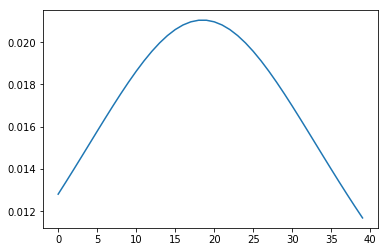

In [23]:
plt.plot(m[19,:])

In [24]:
m[19,:]

array([ 0.01280669,  0.01338841,  0.01398013,  0.01457907,  0.01518194,
        0.01578486,  0.01638339,  0.0169725 ,  0.01754659,  0.01809956,
        0.01862487,  0.01911569,  0.01956504,  0.019966  ,  0.02031199,
        0.02059694,  0.02081561,  0.02096384,  0.02103869,  0.02103869,
        0.02096384,  0.02081561,  0.02059694,  0.02031199,  0.019966  ,
        0.01956504,  0.01911569,  0.01862487,  0.01809956,  0.01754659,
        0.0169725 ,  0.01638339,  0.01578486,  0.01518194,  0.01457907,
        0.01398013,  0.01338841,  0.01280669,  0.01223725,  0.01168194])

In [26]:
len(coords[20,:])

40